## Anomaly Detection with Prophet


In [ ]:
!wget https://raw.githubusercontent.com/numenta/NAB/master/data/realKnownCause/nyc_taxi.csv

--2020-10-05 11:00:52--  https://raw.githubusercontent.com/numenta/NAB/master/data/realKnownCause/nyc_taxi.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 265771 (260K) [text/plain]
Saving to: ‘nyc_taxi.csv’

nyc_taxi.csv        100%[===================>] 259.54K  --.-KB/s    in 0.05s   

2020-10-05 11:00:53 (4.89 MB/s) - ‘nyc_taxi.csv’ saved [265771/265771]



In [ ]:
import datetime
import pandas as pd
import requests
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import plotly.express as px
import numpy as np

mpl.rcParams['figure.figsize'] = (10,8)
mpl.rcParams['axes.grid'] = False

print("import succesfull")

import succesfull


In [ ]:
df = pd.read_csv('nyc_taxi.csv')
df

,timestamp,value
0,2014-07-01 00:00:00,10844
1,2014-07-01 00:30:00,8127
2,2014-07-01 01:00:00,6210
3,2014-07-01 01:30:00,4656
4,2014-07-01 02:00:00,3820
...,...,...
10315,2015-01-31 21:30:00,24670
10316,2015-01-31 22:00:00,25721
10317,2015-01-31 22:30:00,27309
10318,2015-01-31 23:00:00,26591


In [ ]:
df.timestamp = pd.to_datetime(df['timestamp'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10320 entries, 0 to 10319
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  10320 non-null  datetime64[ns]
 1   value      10320 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 161.4 KB


In [ ]:
df = df.set_index('timestamp').resample("H").mean()

In [ ]:
fig = px.line(df.reset_index(), x = 'timestamp',y = 'value',title = 'NYC_Taxi_Demand')

fig.update_xaxes(
    rangeslider_visible= True,
    rangeselector=dict(
                        buttons = list([
                        dict(count = 1,label = '1y',step='month',stepmode = "backward"),
                        dict(count = 2,label = '3y',step='month',stepmode = "backward"),
                        dict(count = 3,label = '5y',step='month',stepmode = "todate"),
                        dict(step= 'all')
                            ])        
                        )
                   )
fig.show()

In [ ]:
from fbprophet import Prophet

In [ ]:
taxi_df = df.reset_index()[['timestamp','value']].rename({'timestamp':'ds','value':'y'}, axis='columns')

In [ ]:
taxi_df

,ds,y
0,2014-07-01 00:00:00,9485.5
1,2014-07-01 01:00:00,5433.0
2,2014-07-01 02:00:00,3346.5
3,2014-07-01 03:00:00,2216.5
4,2014-07-01 04:00:00,2189.5
...,...,...
5155,2015-01-31 19:00:00,28288.5
5156,2015-01-31 20:00:00,24138.0
5157,2015-01-31 21:00:00,24194.5
5158,2015-01-31 22:00:00,26515.0


In [ ]:
train = taxi_df[(taxi_df['ds']>='2014-07-01') & (taxi_df['ds']<='2015-01-27')]
test = taxi_df[(taxi_df['ds']>'2015-01-27')]

In [ ]:
train.shape

(5041, 2)

In [ ]:
test.shape

(119, 2)

In [ ]:
test

,ds,y
5041,2015-01-27 01:00:00,39.5
5042,2015-01-27 02:00:00,29.0
5043,2015-01-27 03:00:00,9.5
5044,2015-01-27 04:00:00,14.5
5045,2015-01-27 05:00:00,29.0
...,...,...
5155,2015-01-31 19:00:00,28288.5
5156,2015-01-31 20:00:00,24138.0
5157,2015-01-31 21:00:00,24194.5
5158,2015-01-31 22:00:00,26515.0


In [ ]:
m = Prophet(changepoint_range=0.95)

In [ ]:
m.fit(train)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [ ]:
m.params

{'beta': array([[ 0.04096154,  0.00862715, -0.03044742, -0.00711378,  0.0130658 ,
          0.0052576 , -0.16877074, -0.0472838 , -0.10865696,  0.02998721,
         -0.00258916,  0.01106294,  0.02710977,  0.00306208]]),
 'delta': array([[-2.96274515e-08, -1.68171349e-02, -4.44542154e-02,
          6.69738972e-08, -6.38614210e-08,  2.42120313e-07,
          1.13754985e-01,  5.85184233e-08, -1.14780628e-03,
         -1.63362660e-03, -4.66626725e-06, -2.74853927e-04,
         -3.54743030e-03, -1.01952354e-01, -1.13592079e-01,
         -7.01846502e-02, -8.13134036e-08,  1.98574030e-07,
          4.35364948e-08, -2.49932993e-07, -8.29299384e-07,
          2.09471538e-02,  1.53129984e-01, -3.97825712e-08,
          7.30693655e-08]]),
 'k': array([[0.06837531]]),
 'm': array([[0.39422449]]),
 'sigma_obs': array([[0.09960932]]),
 'trend': array([[0.39422449, 0.39423805, 0.39425162, ..., 0.38612462, 0.38612514,
         0.38612566]])}

In [ ]:
future = m.make_future_dataframe(periods=119,freq='H')
future.tail(120)

,ds
5040,2015-01-27 00:00:00
5041,2015-01-27 01:00:00
5042,2015-01-27 02:00:00
5043,2015-01-27 03:00:00
5044,2015-01-27 04:00:00
...,...
5155,2015-01-31 19:00:00
5156,2015-01-31 20:00:00
5157,2015-01-31 21:00:00
5158,2015-01-31 22:00:00


In [ ]:
forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
5155,2015-01-31 19:00:00,23778.529213,18869.580652,28456.410000
5156,2015-01-31 20:00:00,24342.584334,19565.326484,28981.684672
5157,2015-01-31 21:00:00,23219.297735,18249.198839,27648.668934
5158,2015-01-31 22:00:00,21027.355314,16230.358680,26099.268580
5159,2015-01-31 23:00:00,18500.216845,13915.025142,22897.836177


In [ ]:
results = pd.concat([taxi_df.set_index('ds')['y'],forecast.set_index('ds')[['yhat','yhat_lower','yhat_upper']]],axis=1).head(20)

In [ ]:
results

,y,yhat,yhat_lower,yhat_upper
ds,,,,
2014-07-01 00:00:00,9485.5,13240.732792,8314.214290,17900.808401
2014-07-01 01:00:00,5433.0,10232.486172,5953.801809,15228.966787
2014-07-01 02:00:00,3346.5,6669.099458,1867.057953,11555.490994
2014-07-01 03:00:00,2216.5,3448.054270,-1415.641045,8133.059237
2014-07-01 04:00:00,2189.5,2017.409931,-2947.312491,6679.799364
2014-07-01 05:00:00,3439.5,3271.503200,-1331.877361,8191.755343
2014-07-01 06:00:00,8782.5,6712.332169,1978.472842,11581.667348
2014-07-01 07:00:00,14861.0,10704.193995,6222.484157,15680.581085
2014-07-01 08:00:00,19133.0,13649.183998,9066.752304,18278.831925


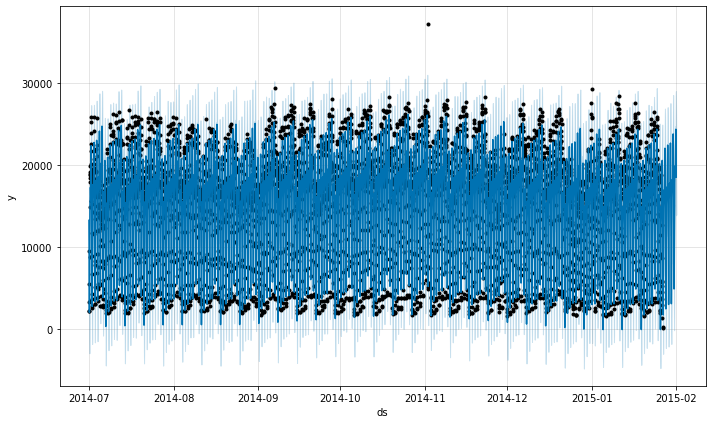

In [ ]:
fig1 = m.plot(forecast)

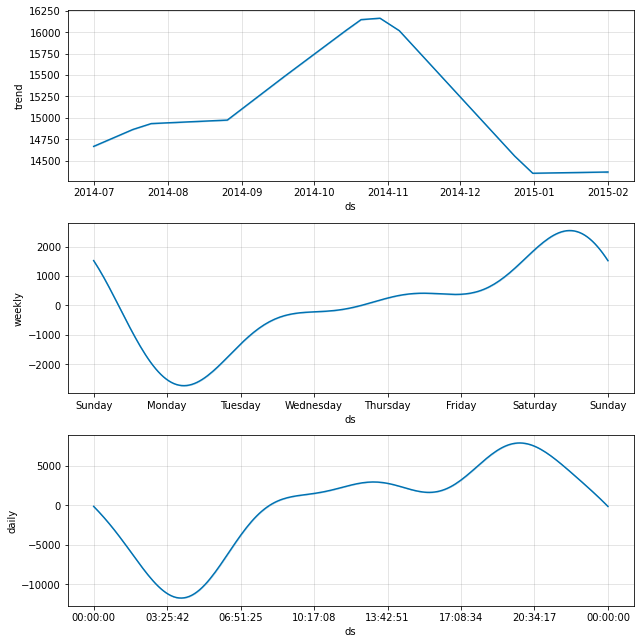

In [ ]:
comp = m.plot_components(forecast);

In [ ]:
results

,y,yhat,yhat_lower,yhat_upper
ds,,,,
2014-07-01 00:00:00,9485.5,13240.732792,8314.214290,17900.808401
2014-07-01 01:00:00,5433.0,10232.486172,5953.801809,15228.966787
2014-07-01 02:00:00,3346.5,6669.099458,1867.057953,11555.490994
2014-07-01 03:00:00,2216.5,3448.054270,-1415.641045,8133.059237
2014-07-01 04:00:00,2189.5,2017.409931,-2947.312491,6679.799364
2014-07-01 05:00:00,3439.5,3271.503200,-1331.877361,8191.755343
2014-07-01 06:00:00,8782.5,6712.332169,1978.472842,11581.667348
2014-07-01 07:00:00,14861.0,10704.193995,6222.484157,15680.581085
2014-07-01 08:00:00,19133.0,13649.183998,9066.752304,18278.831925


In [ ]:
results['error'] = results['y'] - results['yhat']

In [ ]:
results['uncertainity'] = results['yhat_upper'] - results['yhat_lower']

In [ ]:
results.head(2)

,y,yhat,yhat_lower,yhat_upper,error,uncertainity
ds,,,,,,
2014-07-01 00:00:00,9485.5,13240.732792,8314.214290,17900.808401,-3755.232792,9586.594111
2014-07-01 01:00:00,5433.0,10232.486172,5953.801809,15228.966787,-4799.486172,9275.164978


In [ ]:
results[results['error'].abs() > 1.5*results['uncertainity']]

,y,yhat,yhat_lower,yhat_upper,error,uncertainity
ds,,,,,,


In [ ]:
results['anomaly'] = results.apply(lambda x: 'Yes' if (np.abs(x['error']) > 1.5*x['uncertainity']) else 'No', axis=1)

In [ ]:
results

,y,yhat,yhat_lower,yhat_upper,error,uncertainity,anomaly
ds,,,,,,,
2014-07-01 00:00:00,9485.5,13240.732792,8314.214290,17900.808401,-3755.232792,9586.594111,No
2014-07-01 01:00:00,5433.0,10232.486172,5953.801809,15228.966787,-4799.486172,9275.164978,No
2014-07-01 02:00:00,3346.5,6669.099458,1867.057953,11555.490994,-3322.599458,9688.433041,No
2014-07-01 03:00:00,2216.5,3448.054270,-1415.641045,8133.059237,-1231.554270,9548.700282,No
2014-07-01 04:00:00,2189.5,2017.409931,-2947.312491,6679.799364,172.090069,9627.111856,No
2014-07-01 05:00:00,3439.5,3271.503200,-1331.877361,8191.755343,167.996800,9523.632704,No
2014-07-01 06:00:00,8782.5,6712.332169,1978.472842,11581.667348,2070.167831,9603.194505,No
2014-07-01 07:00:00,14861.0,10704.193995,6222.484157,15680.581085,4156.806005,9458.096928,No
2014-07-01 08:00:00,19133.0,13649.183998,9066.752304,18278.831925,5483.816002,9212.079620,No


In [ ]:
fig = px.scatter(df.reset_index(), x = 'timestamp',y = 'value',title = 'NYC_Taxi_Demand')

fig.update_xaxes(
    rangeslider_visible= True,
    rangeselector=dict(
                        buttons = list([
                        dict(count = 1,label = '1y',step='month',stepmode = "backward"),
                        dict(count = 2,label = '3y',step='month',stepmode = "backward"),
                        dict(count = 3,label = '5y',step='month',stepmode = "todate"),
                        dict(step= 'all')
                            ])        
                        )
                   )
fig.show()

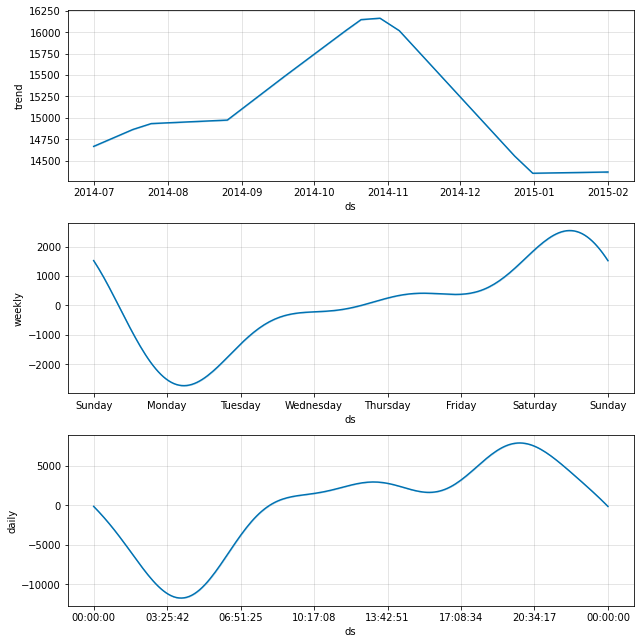

In [ ]:
comp= m.plot_components(forecast);